In [25]:
!pip install pandas
!pip install matplotlib
!pip install tensorflow
!pip install opencv-python
!pip install numpy
!pip install split-folders

In [26]:
import pandas as pd
import cv2 as cv
import os
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
import numpy as np
import matplotlib.pyplot as plt
import cv2
from tensorflow import io
folder='/Users/hotpolarbear/Documents/Programs/Projects/OCR/Dataset_Merged'

In [27]:
'''
Folder
   > Labels
       > Data
'''
import os
directory = folder
track=[]
for filename in os.listdir(directory):
	f = os.path.join(directory, filename)
	if not os.path.isfile(f):
		track.append(f+'/')
for i in track:
	for filename in os.listdir(i):
		f = os.path.join(i, filename)
		try:
			io.decode_image(tf.io.read_file(f))
		except:
			print(f)
			os.remove(f)

In [28]:
import splitfolders
splitfolders.ratio(folder, output="Split-Dataset",seed=1, ratio=(.8, 0.1,0.1)) 

Found 39107 files belonging to 36 classes.
Found 4882 files belonging to 36 classes.


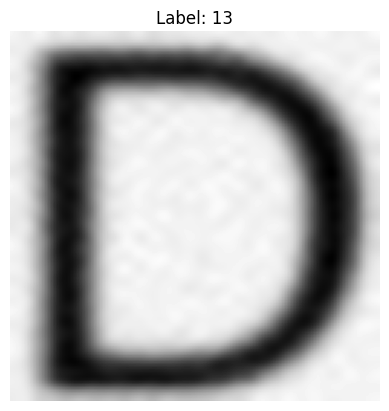

(32, 128, 128, 1) tf.Tensor(
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.], shape=(36,), dtype=float32)


2025-01-22 03:48:29.574939: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [29]:
import tensorflow as tf

training_dataset_path = "/Users/hotpolarbear/Documents/Programs/Projects/OCR/Split-Dataset/train"
training_dataset = tf.keras.utils.image_dataset_from_directory(
    training_dataset_path,
    labels='inferred',  
    label_mode='categorical',   
    image_size=(128, 128),  
    batch_size=32,
    interpolation='lanczos5',
    color_mode='grayscale'   
).repeat()
validation_dataset_path='/Users/hotpolarbear/Documents/Programs/Projects/OCR/Split-Dataset/val'
validation_dataset = tf.keras.utils.image_dataset_from_directory(
    validation_dataset_path,
    labels='inferred',  
    label_mode='categorical',   
    image_size=(128, 128),  
    batch_size=32,
    interpolation='lanczos5',
    color_mode='grayscale'   
).repeat()

val_dataset = validation_dataset.map(lambda x, y: (x/255, y))
train_dataset = training_dataset.map(lambda x, y: (x/255, y))
for images, labels in train_dataset.take(1):
    #cv.imshow('adative_equilisation', images); cv.waitKey(0); cv.destroyAllWindows(); cv.waitKey(1)
    plt.imshow(images[8].numpy().squeeze(), cmap='gray')
    plt.title(f"Label: {tf.argmax(labels[8]).numpy()}")
    plt.axis("off")
    plt.show()
    print(images.shape, labels[8])

In [30]:
model = tf.keras.models.Sequential([
    Input(shape=(128, 128,1)),
    tf.keras.layers.Conv2D(64, (3,3), activation="relu"),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation= "relu"),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation= "relu"),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(64, (3,3), activation= "relu"),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(512, activation ="relu"),
    tf.keras.layers.Dense(36, activation = "softmax")
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [31]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 126, 126, 64)   │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 63, 63, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 61, 61, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 12, 12, 64)     │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 36)             │        18,468 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,494,500 (5.70 MB)

 Trainable params: 1,494,500 (5.70 MB)

 Non-trainable params: 0 (0.00 B)

In [32]:
history = model.fit(
    train_dataset,        
    epochs=10,
    validation_data=val_dataset,  
    steps_per_epoch=100,  
    validation_steps=50   
)

Epoch 1/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 37s 364ms/step - accuracy: 0.2356 - loss: 2.8882 - val_accuracy: 0.7788 - val_loss: 0.8282
Epoch 2/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 36s 359ms/step - accuracy: 0.8258 - loss: 0.6795 - val_accuracy: 0.8438 - val_loss: 0.6300
Epoch 3/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 37s 371ms/step - accuracy: 0.8560 - loss: 0.5721 - val_accuracy: 0.8525 - val_loss: 0.5606
Epoch 4/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 37s 371ms/step - accuracy: 0.8696 - loss: 0.4943 - val_accuracy: 0.8669 - val_loss: 0.5068
Epoch 5/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 37s 374ms/step - accuracy: 0.8845 - loss: 0.4458 - val_accuracy: 0.8519 - val_loss: 0.4802
Epoch 6/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 38s 379ms/step - accuracy: 0.8903 - loss: 0.4168 - val_accuracy: 0.8919 - val_loss: 0.4008
Epoch 7/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 38s 382ms/step - accuracy: 0.9115 - loss: 0.3235 - val_accuracy: 0.8938 - val_loss: 0.3665
Epoch 8/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 38s 382ms/step - accuracy: 0.9144 - loss: 0

In [33]:
testing_dataset_path='/Users/hotpolarbear/Documents/Programs/Projects/OCR/Split-Dataset/test'
testing_dataset=tf.keras.utils.image_dataset_from_directory(
    testing_dataset_path,
    labels='inferred',  
    label_mode='categorical',   
    image_size=(128, 128),  
    interpolation='lanczos5',
    color_mode='grayscale'   
)
test_dataset = testing_dataset.map(lambda x, y: (x/255, y))


Found 4926 files belonging to 36 classes.


In [34]:
class_names = testing_dataset.class_names

In [35]:
print(class_names)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']


(32, 128, 128, 1) (32, 36)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
Predicted:  5 True:  5
Predicted:  25 True:  25
Predicted:  34 True:  34
Predicted:  29 True:  29
Predicted:  13 True:  13
Predicted:  35 True:  35
Predicted:  24 True:  0


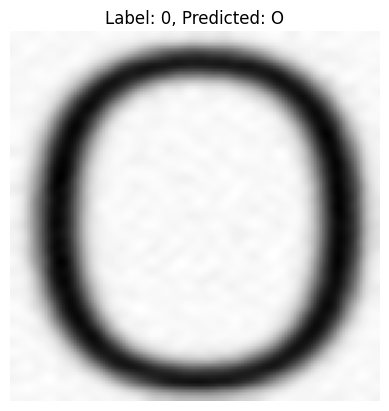

Predicted:  26 True:  26
Predicted:  9 True:  9
Predicted:  1 True:  1
Predicted:  10 True:  10
Predicted:  26 True:  26
Predicted:  3 True:  3
Predicted:  9 True:  9
Predicted:  26 True:  26
Predicted:  2 True:  2
Predicted:  19 True:  19
Predicted:  8 True:  8
Predicted:  0 True:  0
Predicted:  2 True:  2
Predicted:  21 True:  1


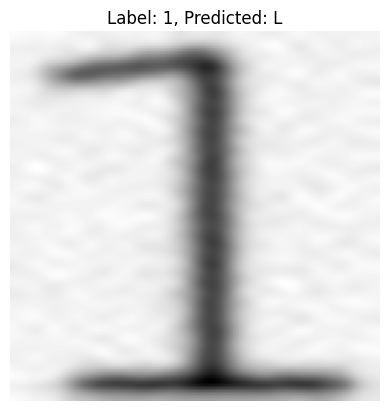

Predicted:  34 True:  34
Predicted:  7 True:  7
Predicted:  24 True:  0


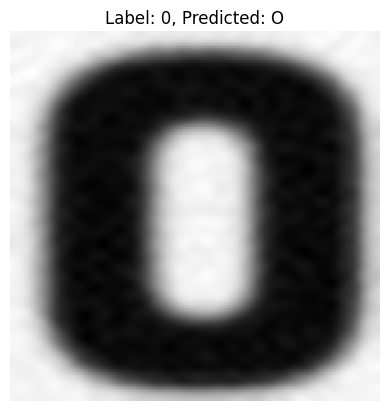

Predicted:  0 True:  0
Predicted:  30 True:  30
Predicted:  33 True:  33
Predicted:  28 True:  28
Predicted:  2 True:  2
Predicted:  28 True:  28
Predicted:  23 True:  23
Predicted:  30 True:  30
3


In [36]:
for images, labels in test_dataset.take(1):
    count=0
    print(images.shape, labels.shape)
    predicted_val=model.predict(images)
    for i in range(0, len(predicted_val)):
        print("Predicted: ", tf.argmax(predicted_val[i]).numpy(),"True: ", tf.argmax(labels[i]).numpy())
        if tf.argmax(predicted_val[i]).numpy() != tf.argmax(labels[i]).numpy():
            count+=1
            plt.imshow(images[i].numpy().squeeze(), cmap='gray')
            plt.title(f"Label: {class_names[tf.argmax(labels[i]).numpy()]}, Predicted: {class_names[tf.argmax(predicted_val[i]).numpy()]}")
            plt.axis("off")
            plt.show()
    print(count)
            

In [37]:
model.save('OCR_N_25M_9181.keras')
model.save('OCR_N_25M_9181.h5')